In [1]:
import numpy as np
from scipy.linalg import eig 
import mdptoolbox, mdptoolbox.example
import random
from numpy.random import seed
import time


def get_next_state(state,action):
    if state == 0:
        if action == 0:
            next_state = 0
            reward = 1
        else:
            next_state = 1
            reward = 1
    if state == 1:
        if action == 0:
            next_state = 0
            reward = 1
        else:
            next_state = 2
            reward = 1
    if state == 2:
        if action == 0:
            next_state = 1
            reward = 1
        else:
            next_state = 2
            reward = 1

    return next_state, reward
    
    
def feature_state(thetha,state):
    if state == 0:
        return thetha[0]
    if state == 1:
        return thetha[0]+ thetha[1]
    if state == 2:
        return thetha[1]
    
def grad_state(state):
    if state == 0:
        return [1,0]
    if state == 1:
        return [1,1]
    if state == 2:
        return [0,1]
    

total_runs = 10
total_iterations = 1000000 #500000
step_size = 0.00001

error_storage_td = np.zeros((total_runs,total_iterations))
error_storage_ptd = np.zeros((total_runs,total_iterations))
error_storage_etd = np.zeros((total_runs,total_iterations))

opt = np.array([[10,10,10]])

for runs in range(total_runs):
    
    np.random.seed((runs+1)*100)
    random.seed((runs+1)*110)

    pi = np.array([[0,1],[0.5,0.5],[1,0]])
    mu = np.array([[0.9,0.1],[0.5,0.5],[0.1,0.9]])
    d_mu = np.array([[5/11,1/11,5/11]])
    thetha = [0,0]
    discount = 0.9
    P_pi= np.array([[0,1,0],[0.5,0,0.5],[0,1,0]])

    F=1
    thetha_ETD = [0,0]
    thetha_td = [0,0]

    eta = 0.5
    state = 0


    for main_iter in range(total_iterations):

        action = np.random.choice(2,1,p=mu[state])[0]
        importance_sampling = pi[state,action]/mu[state,action]     
        next_state,reward = get_next_state(state,action)

        grad = grad_state(state)
        delta = reward + discount*feature_state(thetha_ETD,next_state) - feature_state(thetha_ETD,state)
        temp = F*importance_sampling*step_size*delta
        thetha_ETD = thetha_ETD + np.multiply(temp,grad)

        delta = reward + discount*feature_state(thetha,next_state) - (1+eta)*feature_state(thetha,state)
        temp2 = importance_sampling*step_size*delta
        thetha = thetha + np.multiply(temp2,grad)
        
        delta = reward + discount*feature_state(thetha_td,next_state) - feature_state(thetha_td,state)
        temp3 = importance_sampling*step_size*delta
        thetha_td = thetha_td + np.multiply(temp3,grad)

        F = 1+ discount*importance_sampling*F 
        state = next_state
        
        v_etd = np.zeros((3,1))
        v_ptd = np.zeros((3,1))
        v_td  = np.zeros((3,1))

        for i in range(3):
            v_ptd[i,0] = feature_state(thetha,i)
            v_etd[i,0] = feature_state(thetha_ETD,i)
            v_td[i,0] = feature_state(thetha_td,i)
            
        error_storage_ptd[runs,main_iter] = np.sqrt(np.sum(np.multiply(d_mu.T,np.square(opt.T - v_ptd))))
        error_storage_etd[runs,main_iter] = np.sqrt(np.sum(np.multiply(d_mu.T,np.square(opt.T - v_etd))))
        error_storage_td[runs,main_iter] = np.sqrt(np.sum(np.multiply(d_mu.T,np.square(opt.T - v_td))))

print(thetha,thetha_ETD,thetha_td)

[4.20393505 4.19151887] [2.20086474 2.36131706] [26.72334543 26.60070107]


In [6]:
#Be careful. uncomment.
np.savetxt('offexample-ptd-0.00001',np.average(error_storage_ptd,axis = 0))
np.savetxt('offexample-etd-0.00001',np.average(error_storage_etd,axis = 0))
np.savetxt('offexample-td-0.00001',np.average(error_storage_td,axis = 0))

In [ ]:
[10.00352999  9.88307647] [2.55437024 1.77185827] [1016251.45227724  989046.27686614]

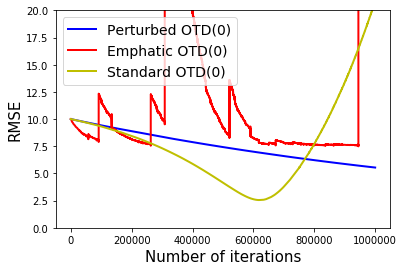

In [5]:
import matplotlib.pyplot as plt
plt.plot(np.average(error_storage_ptd,axis = 0), 'b',linewidth = 2, label = 'Perturbed OTD(0)')
plt.plot(np.average(error_storage_etd,axis = 0), 'r',linewidth = 2, label = 'Emphatic OTD(0)')
plt.plot(np.average(error_storage_td,axis = 0), 'y',linewidth = 2, label = 'Standard OTD(0)')
plt.ylim([0,20])

plt.legend(loc = 'best',prop={'size': 14})
plt.xlabel('Number of iterations',fontsize = 15)
plt.ylabel('RMSE',fontsize = 15)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
for i in range(total_runs):
    plt.plot(error_storage_ptd[i],'b')
plt.plot(np.average(error_storage_ptd,axis = 0), 'r')
plt.ylim([2,20])
plt.ylabel('some numbers')
plt.show()

In [12]:
import numpy as np
from scipy.linalg import eig 
import mdptoolbox, mdptoolbox.example
import random
from numpy.random import seed
import time


def get_next_state(state,action):
    if state == 0:
        if action == 0:
            next_state = 0
            reward = 1
        else:
            next_state = 1
            reward = 1
    if state == 1:
        if action == 0:
            next_state = 0
            reward = 1
        else:
            next_state = 2
            reward = 1
    if state == 2:
        if action == 0:
            next_state = 1
            reward = 1
        else:
            next_state = 2
            reward = 1

    return next_state, reward
    
    
def feature_state(thetha,state):
    if state == 0:
        return thetha[0]
    if state == 1:
        return thetha[0]+ thetha[1]
    if state == 2:
        return thetha[1]
    
def grad_state(state):
    if state == 0:
        return [1,0]
    if state == 1:
        return [1,1]
    if state == 2:
        return [0,1]
    

total_runs = 10
total_iterations = 100000 #500000


error_storage_neg = np.zeros((total_runs,total_iterations))
error_storage_pos = np.zeros((total_runs,total_iterations))

opt = np.array([[10,10,10]])

for runs in range(total_runs):
    
    np.random.seed((runs+1)*100)
    random.seed((runs+1)*110)

    pi = np.array([[0,1],[0.5,0.5],[1,0]])
    mu = np.array([[0.9,0.1],[0.5,0.5],[0.1,0.9]])
    d_mu = np.array([[5/11,1/11,5/11]])
    thetha = [0,0]
    discount = 0.9
    P_pi= np.array([[0,1,0],[0.5,0,0.5],[0,1,0]])

    F=1
    thetha_td = [0,0]

    state = 0


    for main_iter in range(total_iterations):

        action = np.random.choice(2,1,p=mu[state])[0]
        importance_sampling = pi[state,action]/mu[state,action]     
        next_state,reward = get_next_state(state,action)

        grad = grad_state(state)
        
        delta = reward + discount*feature_state(thetha,next_state) - (1+0.4)*feature_state(thetha,state)
        temp2 = importance_sampling*0.001*delta
        thetha = thetha + np.multiply(temp2,grad)
        
        delta = reward + discount*feature_state(thetha_td,next_state) - (1+0.6)*feature_state(thetha_td,state)
        temp3 = importance_sampling*0.001*delta
        thetha_td = thetha_td + np.multiply(temp3,grad)

        F = 1+ discount*importance_sampling*F 
        state = next_state
        
        v_ptd = np.zeros((3,1))
        v_td  = np.zeros((3,1))

        for i in range(3):
            v_ptd[i,0] = feature_state(thetha,i)
            v_td[i,0] = feature_state(thetha_td,i)
            
        error_storage_neg[runs,main_iter] = np.sqrt(np.sum(np.multiply(d_mu.T,np.square(opt.T - v_ptd))))
        error_storage_pos[runs,main_iter] = np.sqrt(np.sum(np.multiply(d_mu.T,np.square(opt.T - v_td))))

print(thetha,thetha_td)

[83.62480869 88.42678153] [4.48966411 4.72905872]


In [ ]:
[83.62480869 88.42678153] [4.48966411 4.72905872]

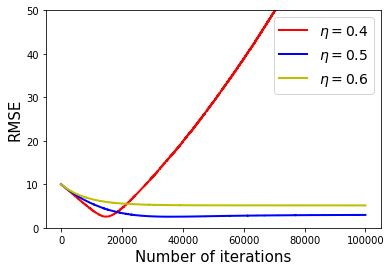

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.average(error_storage_neg,axis = 0), 'r',linewidth = 2, label = '$\eta = 0.4$')
plt.plot(np.average(error_storage_ptd[:,0:100000],axis = 0), 'b',linewidth = 2, label = '$\eta = 0.5$')
plt.plot(np.average(error_storage_pos,axis = 0), 'y',linewidth = 2, label = '$\eta = 0.6$')
plt.ylim([0,50])

plt.legend(loc = 'upper right',prop={'size': 14})
plt.xlabel('Number of iterations',fontsize = 15)
plt.ylabel('RMSE',fontsize = 15)
plt.show()


In [13]:
np.average(error_storage_ptd[:,500000-1],axis = 0)

2.972469071012884